# 9.23

## Population mean

$\textbf{E}(X) = \sum_S x f(x) $ 

if $X$ ~ $\text{Binomial}(K, p)$

it turns out $\textbf{E}(X) = K p $ 

#### example
$X$ ~ $\text{Binomial}(K = 10, p = .5)$ we expect 5 heads. $\textbf{E}(X) = 10 * .5 = 5$

#### example
$X$ ~ $\text{Binomial}(K = 11, p = .5)$ we expect 5.5 heads. $\textbf{E}(X) = 11 * .5 = 5.5$. Population means do not need to be values in the support of the RV itself.

#### example
$X$ ~ $\text{uniform}(a, b) \rightarrow \textbf{E}(x) = \frac{b + a}{2}$

## Likelihood Method

$L(\theta | x) = \prod_{n = 1}^{N} f(x_n | \theta)$

$\theta$ - populations parameter(s)

$L$ - liklihood function

$f(x)$ - probability density function

$x_n$ - the observed RV in the array 

$x$ - the array of observed data

#### Goal: What is the most likely value of \theta, given the observed data x
$\hat{\theta}$ = argmax$[L(\theta | x)]$ Call $\hat\theta$ the maximum likelihood estimator

#### example
$X_1, X_2, ... X_N $ ~ Binomial$(K, p)$

$L(p | x, K) = \prod_{n = 1}^N$  $K\choose{  n}$ $p^{x_n}(1-p)^{K - x_n}$

    0) Take natural log (makes it easier for computer)
    1) Take derivative with respect to p and simplify
    2) Set derivative equal to 0
    3) solve for p
    
board math $\rightarrow \hat p = \frac{\sum x_n}{K N}$

# 9.25

music recomendation: kokoroko

$X_1, ..., X_N$ ~ Binomial$(K, p)$

$L(p|\underline X, k)$ Given the data what is the most likley value of pop paramater p. 

$L(p|\underline X, k) = \prod_{n = 1}^ N f(X_N|p)$

We want the "maximum likliyhood estimator", $\hat p = \text{argmax}_p L(p|\underline X, k)$

for simplicity take natural log. he calls "ln" "log"

$ln(L(p|\underline{X}, k))\\ 
= \sum_{n = 1} ^ N ln f(x_n | p)\\ 
= \sum_{n = 1} ^ N ln({k \choose N} p^{x_n} * (1-p)^{k-x_n})\\ =\sum_{n = 1} ^ N ln({k \choose N}) + ln( p^{x_n}) + ln( (1-p)^{k-x_n}) \\
= \sum_{n = 1} ^ N ln({k \choose N}) + x_n ln( p) + (k-x_n) ln (1-p)\\ 
\propto _p \sum_{n = 1} ^ N x_n ln( p) + *(k-x_n) ln (1-p) $

Lets write this simplified log-likelihood function in python

def(LL_binomial(p, X, k)):

#### Why is it a product example:
Bernoulli = H, T, H

p of this outcome = p * (1-p) * p

p came from the probability density function, so this is really $f(1) * f(0) * f(1) = f(x_1) * ... = \prod_{n = 1} ^N f(x_n) $

now take $\frac{d}{dp}\sum_{n = 1} ^ N x_n ln( p) + (k-x_n) ln (1-p)  \\ = \sum_{n = 1} ^ N \frac{p}{ x_n} - \frac{k-x_n} {1-p}   $ 

so,

$\sum_{n = 1} ^ N \frac{p}{ x_n} = \sum_{n = 1} ^ N \frac{k-x_n} {1-p}$


$\sum_{n = 1} ^ N x_n - p \sum_{n = 1} ^ N x_n   = p * K * k - p \sum_{n = 1} ^ N x_n$


$\sum_{n = 1} ^ N x_n    = p * K * k $

This gives $\hat p$, maximum likliyhood estimator

$\hat p  = \frac{\sum_{n = 1} ^ N x_n}{N * k}$

This is intutitive. $\textbf{E}(X) = k * p$ and the sample mean is $\frac{\sum_{n = 1} ^ N x_n}{N}$ so $\hat p $ is the mean over k, the piece you don't want


In [4]:
def ll_binomial(p, X, K):
    N = X.size
    Sx = np.sum(X)
    return -1 * np.log(p) * Sx - (N * K - Sx) * np.log(1 - p)

In [30]:
N = 1001
K = 12
X = np.random.binomial(K, 0.6, size = N)

In [31]:
#minimize(function, tuple of best guess, 
#arguements, method (always use this), bounds) 
#this is in hw 10

minimize(ll_binomial, (0.5), args = (X, K), 
         method = "L-BFGS-B", bounds = [(1e-5, 1 - 1e-5)])

      fun: array([8062.74711211])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([0.60431235])

# 9.26
### Why math on a computer is hard

in yesterday's example, we needed soft bounds else ln(0) is undefined and its bad!!

In [5]:
p = np.linspace(1e-5, 1-1e-5, 101)
p
plt.plot(p, ll_binomial(p, X, K))

NameError: name 'X' is not defined

### Gamma Random Variable
This is like homework 11

$f(x|\alpha, \beta) = (\beta^\alpha \Gamma(\alpha))^{-1} x^{\alpha - 1} e^{\frac{-x} {\beta}}$ for $\alpha > 0, \beta > 0, x > 0$

$\Gamma$ function is the generilization of factorial to non ints. if $\alpha$ is an int,

$\Gamma(\alpha) = (\alpha - 1)!$

but really,

$\Gamma(\alpha) = \int_0 ^\infty x^{\alpha - 1} e ^ x dx$

Lets make a lileleyhood function
$L(\alpha, \beta |\underline{x}) = \prod_{n=1}^N f(x_n|\alpha, \beta)$

0) take log

$\sum log(f(x_n|\alpha,\beta))$

$\sum [-\alpha log(\beta) - log(\Gamma(\alpha)) + (\alpha - 1) log(x_n) - \frac{x_n}{\beta}]$

Screw this! Python does the derivitaves!

In [37]:
from scipy.special import loggamma
def ll_gamma(theta, X):
    alpha = theta[0]
    beta = theta[1]
    Sx = np.sum(X)
    N = X.size
    return N * alpha * np.log(beta) + N * loggamma(alpha) -\
    (alpha - 1 ) * np.sum(np.log(X)) + Sx / beta

In [60]:
N = 1001
a = 1.24
b = 12.43
X = np.random.gamma(a,b,size = N)

In [61]:
minimize(ll_gamma, (1,1), args = (X), 
         method = "L-BFGS-B", bounds = [(1e-5, np.inf), (1 - 1e-5, np.inf)])

      fun: 3699.2332225827786
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05, -9.09494702e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 60
      nit: 19
   status: 0
  success: True
        x: array([ 1.22090188, 12.27675704])

# 9.30
### Differences between discrete and continous RV's

Discrete RVs can take on at most a countably infinite set of values. $\sum_{\text{support}}f(x) = 1$

Continuous have an uncountably infinite set of values. Now $\int_{\text{support}} f(x) dx = 1$

$\textbf{E}(g(x)) = \int_\text{support} g(x) * f(x) dx$

#### ex
$X$ ~ Exponential($\lambda$)

$f(x|\lambda) = \lambda e^{-\lambda x}$

Find $\textbf{E}(X)$

Just apply definition!

$\textbf{E}(g(x)) = \int_0 ^\infty x  \lambda e^{-\lambda x} dx$

parts

$= \frac{1}{\lambda}$

# 10/7

In [1]:
import numpy as np

$X$ ~ Normal($\mu, \sigma ^2$)

$\textbf{E}(X) = \mu$

$\textbf{V}(X) = \sigma^2$

Normal variable

    "bell curve"
    unimodal (one hump)
    symmetric about $\mu$
    
Ex: let $Y = X - \mu$

$\textbf{E}(Y) = \textbf{E}(X - \mu) = \textbf{E}(X) - \mu$ 

This works because expectation is linear

Subtract mean off of variable shifts distrubtion about zero

so

$ \mu - \mu = 0$

Ex: let $Y = \frac{X - \mu}{\sigma}$

$\textbf{E}(Y) = \frac{1}{\sigma} \textbf{E}(X - \mu) = 0 $

for the same reason as before
    
Ex: let $Y = \frac{X - \mu}{\sigma}$

$\textbf{V}(Y) = \textbf{V}(\frac{X - \mu}{\sigma}) = \frac{1}{\sigma^2} \textbf{V}(X - \mu) = \frac{1}{\sigma^2} \textbf{V}(X) = \frac{1}{\sigma^2} * \sigma^2 = 1$

SO: by letting  $Y = \frac{X - \mu}{\sigma}$ we take our normally distributed random variable and center it about zero with variance 1

Sample mean itself is not a constant, it is its own RV. This is because it is an opperation that depends on RVs. Expecations do return constants because they opperate on population means where as sample means depend on real data with $N$ data points.

$$\textbf{E}(\frac{1}{N} \sum_{n=1}^N X_n) = \frac{1}{N} \textbf{E}(\sum_{n=1}^N X_n)$$
$$= \frac{1}{N} \sum_{n=1}^N  \textbf{E}(X_n)$$
$$= \frac{1}{N} N \mu = \mu$$

Let $X_1, ..., X_N$~$F$



$X_1, ..., X_N$~$F$, all of which are independent
$$\textbf{V}(\frac{1}{N} \sum_{n=1}^N X_n) = \frac{1}{N^2} \textbf{V}(\sum_{n=1}^N X_n)$$

assuming independance,

$$=\frac{1}{N^2} \sum_{n=1}^N  \textbf{V}(X_n) $$

$$= \frac{\sigma^2}{N}$$

This is our uncertanty. The variance of the mean is the width of the guesses of the mean. 

We are quantifying how wrong our guesses are

Let $\textbf{E}(X) = \mu$, all independant

if $\textbf{E}(X)  = \mu & \textbf{V}(X) = \simga^2 < \infty

then

$$\frac{\hat \mu - \mu}{\frac{\sigma}{\sqrt{N}}} \sim N(0,1) $$

# 10.9
### review
$X_1, ... X_N \sim _{iid} F$
iid = independent identically distrubuted (independent data from the same population)

#### central limit thrm 

If $\textbf{E}(X) = \mu$ and If $\textbf{V}(X) = \sigma^2 < \infty$ then $ \frac{\hat\mu - \mu} {\frac{\sigma} {\sqrt N}} \dot \sim N(\mu = 0,\sigma = 1)$ 

This means that the population mean, $\hat \mu$, is itself a normally distributed RV

#### show this in python

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import bplot as bp

In [24]:
#dont do this
muhats1 = np.random.normal(np.pi, 2, 3).mean()
muhats2 = np.random.normal(np.pi, 2, 3).mean()
muhats3 = np.random.normal(np.pi, 2, 3).mean()
muhats4 = np.random.normal(np.pi, 2, 3).mean()
muhats5 = np.random.normal(np.pi, 2, 3).mean()

#do this
R = 1001
muhats = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats[r] = np.random.normal(np.pi, 2, 3).mean()
muhats

array([3.77743419, 4.21858289, 0.54949353, ..., 3.95018255, 2.98642116,
       3.09152145])

(array([  1.,   3.,   5.,  15.,  29.,  44.,  65.,  90., 114., 118., 112.,
        139., 106.,  74.,  34.,  22.,  18.,   6.,   4.,   2.]),
 array([-0.60818265, -0.23810915,  0.13196435,  0.50203785,  0.87211135,
         1.24218485,  1.61225835,  1.98233184,  2.35240534,  2.72247884,
         3.09255234,  3.46262584,  3.83269934,  4.20277284,  4.57284634,
         4.94291984,  5.31299334,  5.68306684,  6.05314034,  6.42321384,
         6.79328734]),
 <a list of 20 Patch objects>)

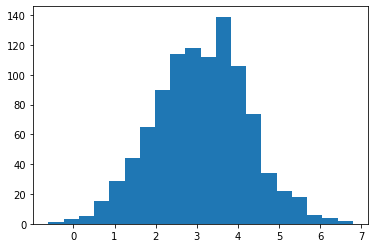

In [25]:
plt.hist(muhats, bins = 20)

std of z =  0.9825579145849849


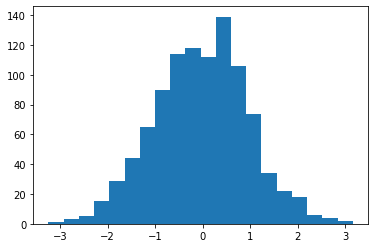

In [26]:
#normlize
z = (muhats - np.pi) / (2 / np.sqrt(3)) 

plt.hist(z, bins = 20)
print("std of z = ", z.std())

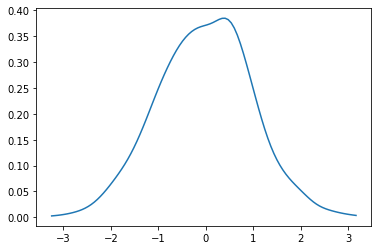

In [32]:
bp.density(z)

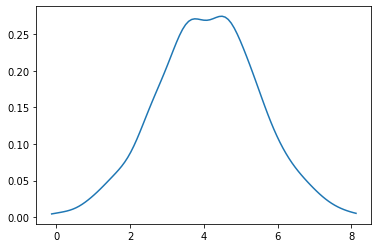

In [35]:
#increse observations to 30, trials to 1, bernulie, p = .64
R = 1001
muhats = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats[r] = np.random.normal(1, .64, 30).mean()
    
z = (muhats - .64) / (np.sqrt(.64 * (1 - .64)/30)) #variance of bernulli = p(1-p)
bp.density(z)

In [38]:
#back to normal example
R = 1001
muhats = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats[r] = np.random.normal(np.pi, 2, 30).mean()
    
z = (muhats - np.pi) / (2 / np.sqrt(30))
z.std()

0.9894055250688116

# 10.10

$X_1, ... , X_N \sim_{iid} F \text{ and } \textbf{V}(X) = \sigma^2 < \infty$

$\frac{\hat \mu - \mu}{\sigma/\sqrt{N}}$ can go 2 ways
1) how we get around the dependance on population parameters? ex) we need to know the population peramaters to find a guess at the statistic. This is kinda silly!

2)How do we deal with a single data set?

Today we take path 1. The key piece in the central lim thrm is in the denomater, the standard deviation of the sample mean. Can we use an array of $\hat \mu$ to figure out population peramaters 



In [2]:
import numpy as np
import bplot as bp

In [15]:
R = 1001
muhats = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats[r] = np.random.normal(np.pi, 2, 10).mean()
    
R = 1001
muhats2 = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats2[r] = np.random.normal(np.pi, 2, 1001).mean()

R = 10001
muhats3 = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    muhats3[r] = np.random.normal(np.pi, 2, 10).mean()

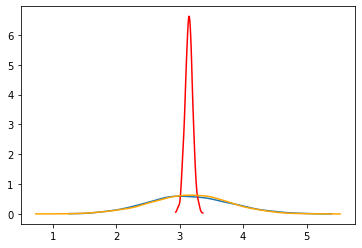

In [17]:
bp.density(muhats)
bp.density(muhats2, color = 'red')
bp.density(muhats3, color = 'orange')

We dont need to know pop mean to know muhats2 has a mean close to what it should be.

In [25]:
print(2/np.sqrt(1001))
print(muhats2.std())

0.0632139541241014
0.06171183699078792


We could also guess the mean by using the median.

In [28]:
R = 1001
medianhats = np.full(R, np.nan) #preallocate memmory. Fill with nan to break if you dont populate something
for r in range(R):
    medianhats[r] = np.median(np.random.normal(np.pi, 2, 10))

3.126728628466738
0.7448901772568078


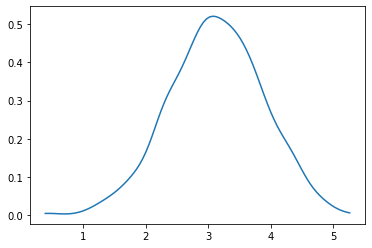

In [30]:
print(medianhats.mean())
print(medianhats.std())
bp.density(medianhats)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import bplot as bp

# 10.14

Let $X \sim N(\mu, \sigma ^2)$

$\textbf{E}(X) = \mu$

$X_1,..., X_R \sim N(\mu, \sigma ^2)$

$\textbf{E}(X) = \frac{1}{R} \sum X_r$

let $\hat \mu = \frac{1}{N} \sum X_n $

$\textbf{E}(\hat \mu) \rightarrow \hat \mu_1, ..., \hat \mu_R \dot \sim N(\mu, \frac{\sigma^2}{N})  $ from central limit thrm

From this array of random vatiables we can estimate a population paramater

$\frac{1}{R} \sum \hat \mu_r$

let $T(\underline{X})$

$\textbf{E}(\hat T) \rightarrow \hat T_1, ..., \hat T_R \sim ???$ but we dont care becuse we have dropped dependance on population paramaters. The arrays of $\hat T s$ has all the info we need. Also know variance is perportional to $N^{-1}$. The mean of the $\hat T$ array is $\textbf{E}(\hat T)$

We can also estimate std. 

$\hat \sigma = \sqrt{\frac{\sum (x_r - \hat \mu)^2}{R}}$



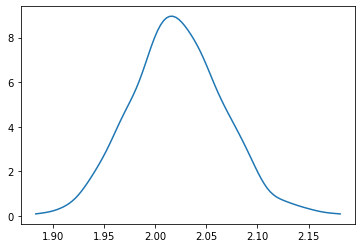

In [8]:
X = np.random.normal(np.pi, 2, 1001)
N = X.size
R = 1001
muhats = np.full(R, np.nan)
for r in range(R):
    muhats[r] = np.std(np.random.choice(X, replace = True, size = N))

bp.density(muhats)

^ we resample R times to get the uncertany

The name for the shape that a summery stat takes on is the sampeling distrubtion

all summery stats have sampling distributions. The central limit thrm tells us that the sampling dist of the sample mean is aprox normal.

summry stats are to be thought of as RV so they have distributions under repeated sampling. With bootstraping we can aproxamate pop params from a distribution we don't know. 

# 10.16

$X_1, ... X_N \rightarrow T(\underline{X})$

T is some function that computes a statistic (estimates pop param). T could be minimize(LLF)

We wnat to quantify uncertanty of T

Sample from origional data set with replacement
First resample WITH REPLACEMENT $X_{1n}$

$X_{11}, ... X_{1N} \rightarrow T_1(\underline{X})$

$X_{21}, ... X_{2N} \rightarrow T_2(\underline{X})$

...

$X_{R1}, ... X_{RN} \rightarrow T_R(\underline{X})$

If $T(\underline{X}) = \frac{1}{N}\sum X_n$ the central limit thrm tells us that the *sampling distribution* of the sample mean is aproxamatly normal. 


When we do a bootstrap we get a bunch of $\underline{T}(\underline{X})$. None of them are more correct than the first T we calculated, we just need them to find the uncertanty. 

The bootstrap procedure does not matter what $T(\underline{X})$ is. There does not need to be a central limit thrm. 

$\frac{\sigma}{\sqrt{N}}$ is called "standard error"

We are interested in a range of value within which we are somewhat confident that the actual paramater lies 

New word: percentile. The medial in the 50th percentile.  definition:$$ \int_{- \infty} ^{m} f(x)dx  = \frac{1}{2}$$

more genetal
$$ \int_{- \infty} ^{\pi_p} f(x)dx  = p$$

If we had a sampling distribution that was not normal


# 10.18

### Other stats class
CLT = $T(X) = \frac{1}{N} \sum X_n$

$$\hat \mu_1, ..., \hat \mu_N  \dot \sim (\mu, \frac{\sigma^2}{N})$$

We provide a range of values that the stat is most likley within. 



In [2]:
import numpy as np
import bplot as bp
from scipy.stats import norm


In [3]:
muhats = np.random.normal(size = 999)
print(np.percentile(muhats,[2.5,97.5]))
norm(0,1).ppf([.025,.975])

[-2.05132793  1.81464835]


array([-1.95996398,  1.95996398])

### This class

$T(X)$ is not nesessarily the sample mean. 

$$\hat T_1, ..., \hat T_R \dot \sim ? $$

We can still make a density plot and esitimate the sampling distribution. The mean of this gives the best guess of $\hat T$. $T(\underline{X}).std$ is still the standard error even tho the sampling distribution may not be symetric

## Other class

Report $\hat \mu \pm 2 \frac{\sigma}{\sqrt N}$

## This class
That does not work because the sampling distribution may not be symetric! "We are 95% confident that the stat is with in the range such and such"

In [4]:
X = np.random.normal(np.pi, 2, size = 999)
R = 1001
print("median = ", np.median(X))
medhats = np.full(R, np.nan)
for r in range(R):
    medhats[r] = np.median(np.random.choice(X, replace = 1, size = X.size))
print(np.percentile(medhats, [2.5, 97.5]))

median =  3.034080213107716
[2.88134229 3.1614884 ]


# 10.21




In [6]:
#Example: index an array with an array
Y = np.asarray([10,9,8,6,43])
idy = np.asarray([2,4,3])
Y[idy]

array([ 8, 43,  6])

In [9]:
X = np.random.normal(np.pi, 2, size = 999)
N = X.size
R = 1001
print("median = ", np.median(X))
medhats = np.full(R, np.nan)
for r in range(R):
    idx = np.random.choice(N, N, replace = 1)
    medhats[r] = np.median(X[idx])
print(np.percentile(medhats, [2.5, 97.5]))

median =  3.2345841622175144
[3.00054534 3.40540784]


In [49]:
#generilize. This is broken!!!
X = np.random.normal(np.pi, 2, size = 999)
R = 1001
def bootstrap(data, R, fun, conf):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = 1)
        thetas[r] = fun(data[idx])
    return np.percentile(thetas, [(1 - conf)/2, 1 - ((1 - conf)/2)])
    #return np.percentile(thetas, [.025,.975])
bootstrap(X, R, np.median, .95)


array([2.83814712, 2.94644948])

In [50]:
S = 20
count = 0
CI = np.full((S, 2), np.nan) #array of confidence intervals. 
for s in range(S):
    X = np.random.normal(np.pi, s, size = 99)
    CI[s, :] = bootstrap(X, R, np.median, .95)
    if CI[s, 0] < np.pi and CI[s, 1] > np.pi:
        count += 1
np.round(count / S, 3)
CI

array([[ 3.14159265,  3.14159265],
       [ 2.92673872,  2.98824734],
       [ 2.31988624,  2.48672327],
       [ 2.18751335,  2.62841654],
       [ 1.40202744,  2.29241585],
       [ 0.41714255,  1.49089653],
       [-0.08339026,  0.04790056],
       [ 0.9011561 ,  1.33838819],
       [-0.88286089,  0.07426051],
       [ 0.99748348,  1.1978727 ],
       [-1.83616158, -1.79667015],
       [-2.42131379, -1.11787117],
       [-2.09057623, -1.71672183],
       [-3.10180098, -1.99995191],
       [-0.18467298,  1.11410218],
       [-4.21050397, -3.51117405],
       [-0.78359656,  0.47984645],
       [-3.11780951, -1.34290356],
       [-1.91229207,  0.67617149],
       [-1.54985775,  1.41184893]])

# 10.23

Start modeling! 

Review simplified log likleyhood

$$X_1, ..., X_N \sim N(\mu, \sigma ^2)$$

All we are interested in is $\mu$

$$L(\mu \ \underline{X}) = \prod _{n = 1} ^N f(X_n | \mu)$$

simplify log of likleyhood

$$\text{log} (L(\mu | \underline{X})) = \sum_{n = 1} ^N \text{log}f(X_n | \mu)$$

if $f(X_n | \mu)$ is a normal dist and we throw out things that wont effect minimization

$$\boxed{\propto \sum_{n=1}^N -(X_N - \mu)^2}$$



Now change the mean 

$$ \sum_{n=1}^N -(X_N - \mu)^2$$

In [31]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
import bplot as bp
from scipy.optimize import minimize
import patsy

In [2]:
def ll_normal(mu, X):
    d = X - mu
    return np.sum(d * d) #products are cheaper than powers!

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/books.csv")
df.head()

,isbn,uclaNew,amazNew
0,978-0803272620,27.67,27.95
1,978-0030119194,40.59,31.14
2,978-0300080643,31.68,32.00
3,978-0226206813,16.00,11.52
4,978-0892365999,18.95,14.21


In [4]:
#dir(df)
#runing this shows all the methods and members. There are a lot...

#help(pd.read_csv) 
#gets help

In [5]:
df['uclaNew'].values #unwraps the numpy array

array([ 27.67,  40.59,  31.68,  16.  ,  18.95,  14.95,  24.7 ,  19.5 ,
       123.84,  17.  ,  31.63, 116.  ,  27.67,  24.7 , 126.67,  53.9 ,
        89.73, 171.  , 152.  , 124.8 ,  16.  ,  25.95,  18.  ,  21.73,
        40.59,  28.95,  19.95,  49.45,  41.09,  50.95,  44.5 ,  82.45,
        34.6 ,  88.42,  84.  ,  11.25,  15.  , 180.03, 174.  , 188.58,
       146.75, 183.75, 214.5 , 197.  , 194.  , 176.25,  24.7 , 188.  ,
        29.7 ,  26.24,  55.13,  43.56, 129.6 , 123.84,  85.12, 152.48,
        29.7 ,  24.7 ,  89.71,  10.5 ,  92.88, 100.88,  11.95,  72.47,
        92.1 ,  78.35,  42.  ,  18.75,  48.46,  39.55,  29.65,  23.76,
        27.7 ])

In [6]:
#you can treat columns of a dataframe as a numpy array.
#Vectorized math works on colmuns of dfs just like we
#have been doing with normal arrays.

df['uclaNew'] + 2

0     29.67
1     42.59
2     33.68
3     18.00
4     20.95
      ...  
68    50.46
69    41.55
70    31.65
71    25.76
72    29.70
Name: uclaNew, Length: 73, dtype: float64

In [7]:
print(df.columns)
print(df.shape)

Index(['isbn', 'uclaNew', 'amazNew'], dtype='object')
(73, 3)


In [8]:
#bootstrap the data

df['uclaNew']

N = df.shape[0]
R = 1001
mus = np.full(R, np.nan)
for r in range(R):
    idx = np.random.choice(N, N, replace = 1)
    mus[r] = minimize(ll_normal, (50), args = (df['uclaNew'][idx]),\
                      method = "BFGS").x #BFGS means we dont need bounds
#mus.mean()

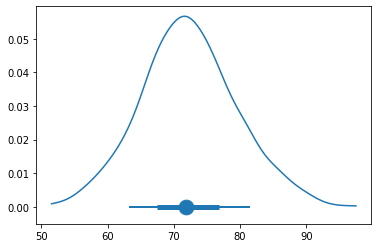

In [9]:
bp.density(mus)
bp.percentile_h(mus, y = 0)

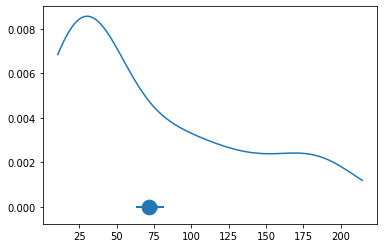

In [10]:
#this is more common
bp.density(df['uclaNew'])
bp.percentile_h(mus, y = 0)

In [17]:
def optim(data, initval = None):
    if not initval:
        initval = np.random.normal()
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r] = fun(data[idx])
    return np.percentile(thetas, [25, 75])

R = 1001
print(df['uclaNew'].mean(), bootstrap(df['uclaNew'], R, optim))
print(df['amazNew'].mean(), bootstrap(df['amazNew'], R, optim))

#20.3 s ± 632 ms per loop

72.22191780821916 [67.76685093 77.20438567]
72.22191780821916 [66.77055424 76.16438362]
72.22191780821916 [68.01287001 77.14670179]
72.22191780821916 [68.02737313 77.09656541]
72.22191780821916 [68.10603712 76.51191819]
72.22191780821916 [67.6843878  76.19370382]
72.22191780821916 [67.51247264 76.48999802]
72.22191780821916 [67.20096854 76.48109217]
20.3 s ± 632 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 10.24

Paired data: when you have two observations tied together. There exists a 1 to 1 telation between every observation in the data set. 

Ex: book price at amazon vs at ucla for a given book

Ex: 2 measurements on oppisite sides of a symetric thing. for ex my arm lengths are paired to me. 

Ex: 2 measurements across one time point.

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/books.csv")
df['diff'] = df['amazNew'] - df['uclaNew']
df.head()

,isbn,uclaNew,amazNew,diff
0,978-0803272620,27.67,27.95,0.28
1,978-0030119194,40.59,31.14,-9.45
2,978-0300080643,31.68,32.00,0.32
3,978-0226206813,16.00,11.52,-4.48
4,978-0892365999,18.95,14.21,-4.74


In [28]:
def ll_normal(mu, X):
    d = X - mu
    return np.sum(d * d) #products are cheaper than powers!

def optim(data, initval = None):
    if not initval:
        initval = np.random.normal()
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r] = fun(data[idx])
    return np.percentile(thetas, [25, 75])

R = 1001
print('we are 50% confident that the mean price of books at amazon\
is', bootstrap(df['diff'], R, optim), 'cheaper than ucla bookstore')

      

we are 50% confident that the mean price of books at amazonis [-13.86369866 -11.71465579] cheaper than ucla bookstore


#### two sample means
When you want to compare means amongst two variables. They may not have the same number of observations 

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/roualdes/data/master/possum.csv')
df.head()

,site,pop,sex,age,headL,skullW,totalL,tailL
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


model: When compairing a catagorical vatiable to a numeric vatiable you calculate the means of the catagories and find the difference

In [32]:
patsy.dmatrix('~C(pop)', data = df) 
#make a design marix based around the catagorical variable pop

DesignMatrix with shape (104, 2)
  Intercept  C(pop)[T.other]
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
          1                0
  [74 rows omitted]
  Terms:
    'Intercept' (column 0)
    'C(pop)'

# 10.28

restating "2 sample means" above ^

to restate: we are interested in compairing the means of a numeric variable across two catigorial variables. $\beta_1$ is the difference between the means. 

In [1]:
import numpy as np
import bplot as bp
import matplotlib.pyplot as plt
import patsy
import pandas as pd
from scipy.optimize import minimize


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/roualdes/data/master/possum.csv')
X = patsy.dmatrix('~C(pop)', data = df) 
yX = np.c_[df['totalL'], X]
print(yX[-5:, :])
df.head()

[[81.5  1.   0. ]
 [82.5  1.   0. ]
 [89.   1.   0. ]
 [82.5  1.   0. ]
 [89.   1.   0. ]]


,site,pop,sex,age,headL,skullW,totalL,tailL
0,1,vic,m,8.0,94.1,60.4,89.0,36.0
1,1,vic,f,6.0,92.5,57.6,91.5,36.5
2,1,vic,f,6.0,94.0,60.0,95.5,39.0
3,1,vic,f,6.0,93.2,57.1,92.0,38.0
4,1,vic,f,2.0,91.5,56.3,85.5,36.0


In [3]:
def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
    d = y - mu
    return np.sum(d * d)

betahat = minimize(ll_normal, np.random.normal(size=2), args = (yX), method = "BFGS").x

betahat

array([86.78793123,  0.67946003])

In [4]:
#simple code to get out the group means

df.groupby('pop').totalL.agg("mean")

pop
other    86.787931
vic      87.467391
Name: totalL, dtype: float64

In [5]:
#This indexes a list/array 
for i, j in enumerate(range(5,10)):
    print(i, j)
    
a , b = df.groupby('pop')
print(a)
print()
print(b)

0 5
1 6
2 7
3 8
4 9
('other',      site    pop sex  age  headL  skullW  totalL  tailL
46      3  other   m  2.0   90.1    54.8    89.0   37.5
47      3  other   m  5.0   98.6    63.2    85.0   34.0
48      3  other   m  4.0   95.4    59.2    85.0   37.0
49      3  other   f  5.0   91.6    56.4    88.0   38.0
50      3  other   f  5.0   95.6    59.6    85.0   36.0
51      3  other   m  6.0   97.6    61.0    93.5   40.0
52      3  other   f  3.0   93.1    58.1    91.0   38.0
53      4  other   m  7.0   96.9    63.0    91.5   43.0
54      4  other   m  2.0  103.1    63.2    92.5   38.0
55      4  other   m  3.0   99.9    61.5    93.7   38.0
56      4  other   f  4.0   95.1    59.4    93.0   41.0
57      4  other   m  3.0   94.5    64.2    91.0   39.0
58      4  other   m  2.0  102.5    62.8    96.0   40.0
59      4  other   f  2.0   91.3    57.7    88.0   39.0
60      5  other   m  7.0   95.7    59.0    86.0   38.0
61      5  other   f  3.0   91.3    58.0    90.5   39.0
62      5  other  

other

     site    pop sex  age  headL  skullW  totalL  tailL
46      3  other   m  2.0   90.1    54.8    89.0   37.5
47      3  other   m  5.0   98.6    63.2    85.0   34.0
48      3  other   m  4.0   95.4    59.2    85.0   37.0
49      3  other   f  5.0   91.6    56.4    88.0   38.0
50      3  other   f  5.0   95.6    59.6    85.0   36.0
51      3  other   m  6.0   97.6    61.0    93.5   40.0
52      3  other   f  3.0   93.1    58.1    91.0   38.0
53      4  other   m  7.0   96.9    63.0    91.5   43.0
54      4  other   m  2.0  103.1    63.2    92.5   38.0
55      4  other   m  3.0   99.9    61.5    93.7   38.0
56      4  other   f  4.0   95.1    59.4    93.0   41.0
57      4  other   m  3.0   94.5    64.2    91.0   39.0
58      4  other   m  2.0  102.5    62.8    96.0   40.0
59      4  other   f  2.0   91.3    57.7    88.0   39.0
60      5  other   m  7.0   95.7    59.0    86.0   38.0
61      5  other   f  3.0   91.3    58.0    90.5   39.0
62      5  other   f  6.0   92.0    56.4 

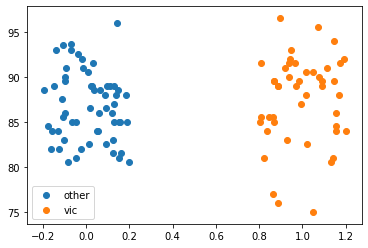

In [6]:
for i, (name, gdf) in enumerate(df.groupby('pop')):
    print(name)
    print()
    print(gdf)
    x = np.repeat(i, gdf['totalL'].size)
    y = gdf['totalL']
    bp.jitter(x, y, jitter_y = 0, label = name, color = bp.color[i])
    bp.legend()


# 10.30

restate ll_normal, plotting

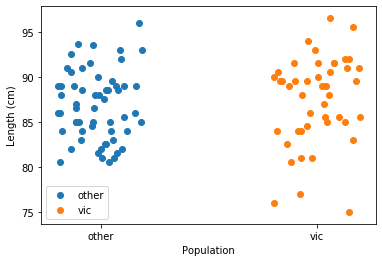

In [7]:
for i, (name, gdf) in enumerate(df.groupby('pop')):
    x = np.repeat(i, gdf['totalL'].size)
    y = gdf['totalL']
    bp.jitter(x, y, jitter_y = 0, label = name, color = bp.color[i])
    

bp.labels(x = 'Population', y = 'Length (cm)' )
bp.legend()

In general: 

$$y_n \sim N(\mu_n, \sigma^2)$$

$$\mu_n = \beta_0 + \beta_1 * x_n$$

Spicifically:

$$\text{totalL_n} \sim N(\mu_n,, \sigma^2)$$
$$\mu_n = \beta_0 + \beta_1 * \text{vic}_n$$

where vic is the design matrix!

simplified log likleyhood for normal RV:

$$\sum_{n = 1}^N (y_n - \mu)^2$$

but now we have 
\
$$\sum_{n = 1}^N (y_n - (\beta_0 + \beta_1 * x_n))^2$$

In [8]:
X = patsy.dmatrix("~C(pop)", data = df)
yX = np.c_[df['totalL'], X]
X = yX[:, 1:]
X[-5:, :]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 11.1
Now we allow for more than 2 levels of catagorigal variable

In [10]:
import numpy as np
import bplot as bp
import matplotlib.pyplot as plt
import patsy
import pandas as pd
from scipy.optimize import minimize

def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
    d = y - mu
    return np.sum(d * d)

def optim(data, initval = None):
    if not initval:
        N, k = data.shape 
        k -= 1
        initval = np.random.normal(size = k)
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N, k = data.shape
    k -= 1
    thetas = np.full((R, k), np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r, :] = fun(data[idx, :])
    return thetas

df = pd.read_csv('https://raw.githubusercontent.com/roualdes/data/master/possum.csv')
X = patsy.dmatrix('~C(pop)', data = df) 
yX = np.c_[df['totalL'], X]

R = 1001
mus = bootstrap(yX, R, optim)

mus

array([[87.16440673,  0.73559326],
       [86.47999999,  1.42740744],
       [86.3968253 ,  1.49341873],
       ...,
       [86.24444443,  2.4750677 ],
       [85.85238086,  0.90371665],
       [86.49531248,  0.6421875 ]])

[85.76470588 87.77021269]
[-1.17199386  2.41109472]
do it with vectorization!!
[[85.76470588 -1.17199386]
 [87.77021269  2.41109472]]
matrix transpose to go by rows
[[85.76470588 87.77021269]
 [-1.17199386  2.41109472]]


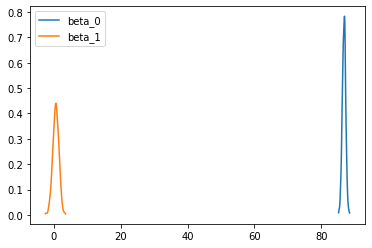

In [29]:
bp.density(mus[:, 0], color = bp.color[0], label = 'beta_0')
bp.density(mus[:, 1], color = bp.color[1], label = 'beta_1')
bp.legend()

print(np.percentile(mus[:, 0], [2.5,97.5]))
print(np.percentile(mus[:, 1], [2.5,97.5]))
print("do it with vectorization!!")
print(np.percentile(mus, [2.5, 97.5], axis = 0))
print('matrix transpose to go by rows')
print(np.percentile(mus, [2.5, 97.5], axis = 0).T)

In [32]:
#This gives the mean for the second population that is defined
#as the sum as beta_0 and beta_1
np.percentile(mus.sum(axis = 1), (2.5, 97.5))

array([85.91111124, 88.78260883])

# 11.13

In [3]:
import numpy as np
import bplot as bp
import matplotlib.pyplot as plt
import patsy
import pandas as pd
from scipy.optimize import minimize
import joblib

def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
    d = y - mu
    return np.sum(d * d)

def optim(data, initval = None):
    if not initval:
        N, k = data.shape 
        k -= 1
        initval = np.random.normal(size = k)
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N, k = data.shape
    k -= 1
    thetas = np.full((R, k), np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r, :] = fun(data[idx, :])
    return thetas

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")
df.head()

,site,pop,sex,age,headL,skullW,totalL,tailL
0,1,vic,m,8.0,94.1,60.4,89.0,36.0
1,1,vic,f,6.0,92.5,57.6,91.5,36.5
2,1,vic,f,6.0,94.0,60.0,95.5,39.0
3,1,vic,f,6.0,93.2,57.1,92.0,38.0
4,1,vic,f,2.0,91.5,56.3,85.5,36.0


### 2 means model
$$Y_n \sim N(\mu_n, \sigma^2)$$
$$\mu_n = \beta_0 + \beta_1 x_n$$

### Simple linear regression
Now we change the catagorical vatiable and make it numeric. Put a "best" line through the data. 

The "$x$" is called the explanatory variable, "$y$" is the response. "on the x axis is the 'x'planatory varable"

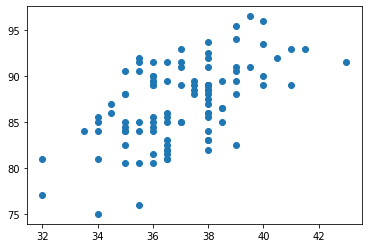

In [5]:
bp.point(df['tailL'],df['totalL'])

In [8]:
X = patsy.dmatrix("~ tailL", data = df)
yX = np.c_[df['totalL'], X]
yX[:5, :]

array([[89. ,  1. , 36. ],
       [91.5,  1. , 36.5],
       [95.5,  1. , 39. ],
       [92. ,  1. , 38. ],
       [85.5,  1. , 36. ]])

Dmatrix has the same logic, but it is numeric instead of an indicator

In [14]:
minimize(ll_normal, np.random.normal(size = 2), args = yX, method = "BFGS")['x']

array([41.03721163,  1.24430501])

$$\beta_0 + \beta_1 x_n = \mu_n \rightarrow 41.0 + 1.2 x = \mu$$
"For every 1 cm increse in tail length we expect total length to increse by a factor of 1.2"

In [29]:
R = 1001
betas = bootstrap(yX, R, optim)

/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


[[33.11550296 48.98147102]
 [ 1.02908774  1.45178838]]



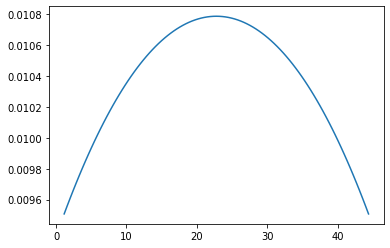

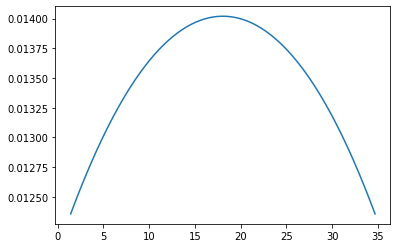

In [30]:
print(np.percentile(betas, [10, 90], axis = 0).T)

bp.density(betas[0])
plt.figure()
bp.density(betas[1])
print()

Extrapolation- predicting outside of the range of data. It is dangerous and is the root of all evil. ex: if you only have 

# 11.14 
## simple linear regression


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/elmhurst.csv")

df.head()

,family_income,gift_aid,price_paid
0,92.922,21.72,14.28
1,0.250,27.47,8.53
2,53.092,27.75,14.25
3,50.200,27.22,8.78
4,137.613,18.00,24.00


$$Y_n \sim N(\mu_n, \sigma^2)$$
each y point is a normal varable about a line with standard devation. $\mu$ is given by
$$\mu_n = \beta_0 + \beta_1 x_n$$

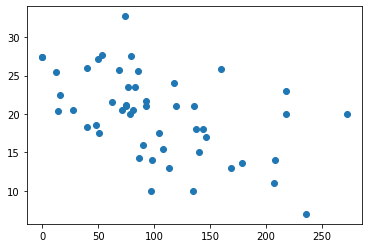

In [7]:
plt.scatter(df['family_income'], df['gift_aid'])
print()

In [8]:
X = patsy.dmatrix("~ family_income", data = df)
yX = np.c_[df['gift_aid'], X]
yX[:5, :]

array([[ 21.72 ,   1.   ,  92.922],
       [ 27.47 ,   1.   ,   0.25 ],
       [ 27.75 ,   1.   ,  53.092],
       [ 27.22 ,   1.   ,  50.2  ],
       [ 18.   ,   1.   , 137.613]])

In [10]:
betahat = minimize(ll_normal, np.random.normal(size = 2), args = yX, method = "BFGS")['x']
betahat

array([24.31933157, -0.04307168])

when family income is at 0 we expect gift aid to be $\$$24,000

for every $\$$1000 of additional income we expect the amount of gift aid to decrese by $\$$.043 thousand 

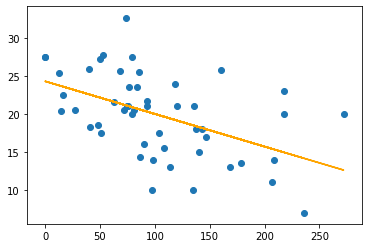

In [12]:
plt.plot(df['family_income'], betahat[0] + betahat[1] * df['family_income'], color = 'orange')
plt.scatter(df['family_income'], df['gift_aid'])
print()

In [19]:
#if income is 100,000 we expect gift aid to be

print(betahat[0] + betahat[1] * 100, "thousand dollars")
#better notation
print(np.sum(betahat * np.asarray([1, 100])))

20.012163785565765 thousand dollars
20.012163785565765


In [20]:
betas = bootstrap(yX, 1001, optim)

/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/herbiek9/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [21]:
np.percentile(betas, [10, 90], axis = 0).T

array([[22.89553162, 25.95422881],
       [-0.05963614, -0.02972949]])

In [22]:
betas[:5,:]

array([[24.77203822, -0.04351578],
       [22.79509103, -0.02906071],
       [24.02936455, -0.03939499],
       [25.15541748, -0.04296749],
       [24.31892565, -0.04289876]])

[19.12652236 20.81713186]
we are 80% confident that if family income is $100 thousand the gift aidthe gift aid will be between $19 and $20 thousand


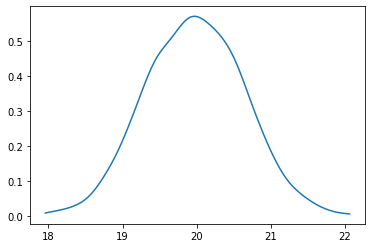

In [39]:
#with $100,000 find a confadance interval of the expected aid
R = 1001
giftaidhat = np.full(R, np.nan)
for i in range(R):
    giftaidhat[i] = np.sum(betas[i, :] * np.asarray([1, 100])) 
bp.density(giftaidhat)
print(np.percentile(giftaidhat, [10,90], axis = 0).T)
print('we are 80% confident that if family income is $100 thousand the gift aid\
the gift aid will be between $19 and $20 thousand')

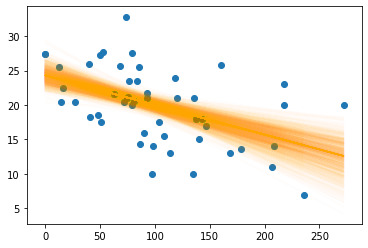

In [41]:
plt.plot(df['family_income'], betahat[0] + betahat[1] * df['family_income'], color = 'orange')
plt.scatter(df['family_income'], df['gift_aid'])
for i in range(R):
    bp.line(df['family_income'], betas[i, 0] + betas[i, 1] * df['family_income'], color = 'orange', alpha = .01)
print()

In [1]:
import numpy as np
import bplot as bp
import matplotlib.pyplot as plt
import patsy
import pandas as pd
from scipy.optimize import minimize
import joblib

def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
    d = y - mu
    return np.sum(d * d)

def optim(data, initval = None):
    if not initval:
        N, k = data.shape 
        k -= 1
        initval = np.random.normal(size = k)
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N, k = data.shape
    k -= 1
    thetas = np.full((R, k), np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r, :] = fun(data[idx, :])
    return thetas

# 11.21

Strength, linear, association, sign. 

In [28]:
x = np.random.normal(size = 101)
y = 3*x + np.random.normal(size = 101)
df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,-1.294887,-2.789032
1,-2.907415,-8.366390
2,0.028784,1.171248
3,1.343520,5.558615
4,0.085153,-0.636680


In [29]:
r = df.corr()
r

,x,y
x,1.000000,0.954204
y,0.954204,1.000000


In [46]:
r = df.corr()['y'][0]
r * r

0.9105045861215102

^that much^% of the variation in y is explained by this linear model

In [47]:
df.sort_values(by = ['x'], inplace = True)
X = patsy.dmatrix('~ x', data =df)
yX = np.c_[df['y'], X]
betahat = optim(yX)
betahat

array([-0.13425819,  3.02103495])

In [48]:
N = yX.shape[0]
k = yX.shape[1] - 1
mu = np.full(N, np.nan)
for n in range(N):
    mu[n] = np.sum(yX[n, 1:] * betahat)

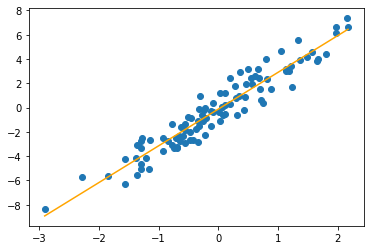

In [49]:
bp.point(df['x'], df['y'])
bp.line(df['x'], mu, color = 'orange')

In [50]:
error = df['y'] - mu
np.var(error) / np.var(df['y'])

0.08949541387849005

^ This is the percent of the unexplained variation relitive to the variation in y. This is the percent variation in y as explained by our model. this is equal to $1 - R^2$

In [54]:
def adjustedR2(y, mu, k):
    error = y - mu
    return 1 - (np.var(error) / np.var(y)) * (N - 1) /(N - k)

adjustedR2(df['y'], mu, k)

0.9096005920419292

# 12.4

In [8]:
import numpy as np
import bplot as bp
import matplotlib.pyplot as plt
import patsy
import pandas as pd
from scipy.optimize import minimize
import joblib

def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
    d = y - mu
    return np.sum(d * d)

def optim(data, initval = None):
    if not initval:
        N, k = data.shape 
        k -= 1
        initval = np.random.normal(size = k)
    return minimize(ll_normal, (initval), args = (data), method = "BFGS").x
    
def bootstrap(data, R, fun):
    N, k = data.shape
    k -= 1
    thetas = np.full((R, k), np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace = True)
        thetas[r, :] = fun(data[idx, :])
    return thetas

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")


We are adding in an offset to the line for male relitive to female. This model allows independent intersepts but they have the same slope.

$totalL_n \sim N(\mu_n, \sigma^2)$

$\mu_n = \beta_0 + \beta_1 * Male + \beta_2 * headL$

so for males the intersept is $\beta_0 + \beta_1 * 1$ and for females its $ \beta_0 + \beta_1 * 0 = \beta_0$

In [11]:
X = patsy.dmatrix("~ C(sex) + headL", data = df)
yX = np.c_[df['totalL'], X]
betahat = optim(yX)

In [12]:
np.unique(df['sex'])

array(['f', 'm'], dtype=object)

In [13]:
betahat

array([ 8.26148227, -2.06457832,  0.86431361])

Now allow for independent slopes


$\mu_n = \beta_0 + \beta_1 * Male + \beta_2 * headL + \beta_3 * headL * Male$

In [17]:
X = patsy.dmatrix("~ C(sex) + headL + C(sex):headL", data = df)
yX = np.c_[df['totalL'], X]
betahat = optim(yX)
betahat

array([-28.72144266,  45.08354618,   1.26565264,  -0.51073288])

In [30]:
# if a female possom had a length of 90mm we expect her head length would be 85cm
np.sum(np.asarray([1, 0, 90, 0]) * betahat) #this is really an example row 
#of a design matrix

85.18729517155552

In [22]:
# if a male possom had a length of 90mm we expect his head length would be 84cm
np.sum(np.asarray([1, 1, 90, 90]) * betahat)

84.30488179132695

In [37]:
def predict_normal(beta, X):
    N = X.shape[0] #observations 
    mu = np.full(N, np.nan)
    for n in range (N):
         mu[n] = np.sum (X[n, :] * beta)
    return mu

def predict_normal_vec(beta, X):
    return np.sum(beta * X, axis = 1)
predict_normal(betahat, X)

array([87.4000528 , 88.35142678, 90.24990574, 89.23738363, 87.08577414,
       89.11081836, 88.30595651, 91.26242786, 89.49051416, 87.46546993,
       89.36394889, 91.38899312, 88.15497256, 88.38144849, 86.49414909,
       85.5127534 , 91.13586259, 86.94710095, 90.7561668 , 91.26242786,
       92.65464576, 89.06087627, 88.35142678, 87.62652873, 88.68341639,
       88.83440034, 85.82012149, 87.17357687, 88.73112257, 87.84516572,
       86.41865712, 90.62960153, 85.36176945, 84.75783365, 87.62652873,
       86.79611699, 84.30133832, 86.11668921, 78.47933617, 86.45294781,
       83.16225094, 80.75675893, 85.18729517, 80.60577497, 84.83332562,
       85.36176945, 84.38037377, 90.79719171, 88.38144849, 87.2123394 ,
       92.27494997, 90.04227196, 89.11081836, 89.51382812, 94.19433063,
       91.7785874 , 91.64212365, 87.7020207 , 93.74137877, 86.83264361,
       88.60792441, 86.83264361, 87.71860046, 93.92029841, 89.61707942,
       85.69355623, 86.79611699, 87.4000528 , 90.34423986, 87.59

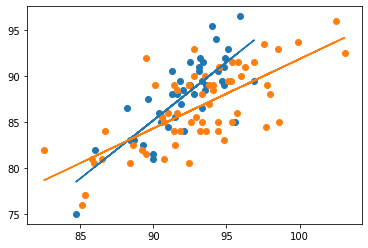

In [38]:
for i, (name, gdf) in enumerate(df.groupby('sex')):
    x = gdf['headL']; col = bp.color[i]
    bp.point(x , gdf['totalL'], color = col)
    
    idx = df['sex'] == name
    bp.line(x, predict_normal_vec(betahat, X[idx, : ]), color = col)